# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = df.iloc[:, [1]].values
y = df.iloc[:, -1].values

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

## Training the Linear Regression model on the whole dataset

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Training the Polynomial Regression model on the whole dataset

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(4)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Visualising the Linear Regression results

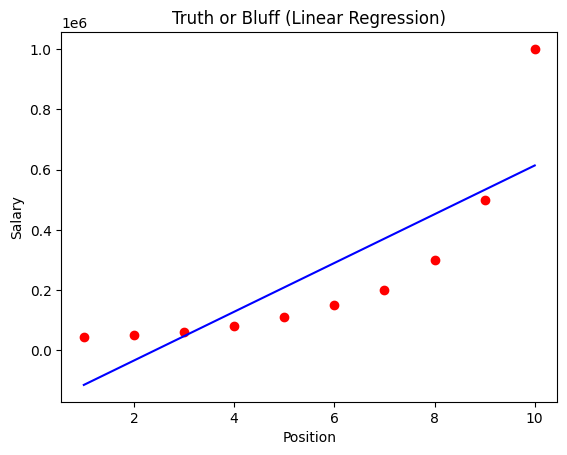

In [7]:
plt.scatter(sc.inverse_transform(X), y, color="red")
plt.plot(sc.inverse_transform(X), lin_reg.predict(X), color="blue")
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results

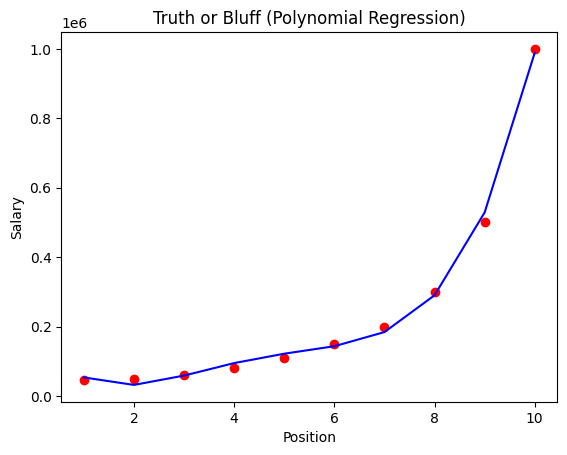

In [8]:
plt.scatter(sc.inverse_transform(X), y, color="red")
plt.plot(sc.inverse_transform(X), lin_reg_2.predict(X_poly), color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

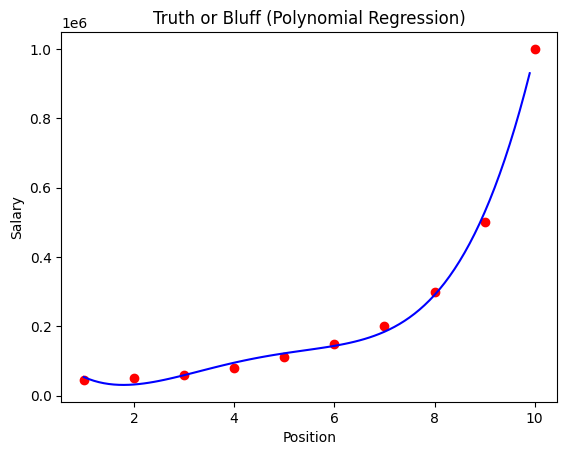

In [9]:
X_grid = np.arange(np.min(sc.inverse_transform(X)), np.max(sc.inverse_transform(X)), 0.1).reshape(-1, 1)
X_grid_poly = poly_reg.fit_transform(sc.transform(X_grid))

plt.scatter(sc.inverse_transform(X), y, color="red")
plt.plot(X_grid, lin_reg_2.predict(X_grid_poly), color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

## Predicting a new result with Linear Regression

In [10]:
lin_reg.predict(sc.transform([[6.5]]))

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [11]:
lin_reg_2.predict(poly_reg.fit_transform(sc.transform([[6.5]])))

array([158862.45265152])